<a href="https://colab.research.google.com/github/pinilDissanayaka/Deep-Learning-based-Corn-Leaf-Disease-Classification/blob/main/ConModel1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, Dense, Dropout, BatchNormalization, MaxPooling2D, Flatten, Rescaling, InputLayer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from livelossplot import PlotLossesKerasTF
from glob import glob

import warnings
warnings.filterwarnings(action = 'ignore')

In [5]:
! mkdir ~/.kaggle
! ! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download smaranjitghose/corn-or-maize-leaf-disease-dataset

 88% 141M/161M [00:01<00:00, 156MB/s]
100% 161M/161M [00:01<00:00, 154MB/s]


In [7]:
! unzip /content/corn-or-maize-leaf-disease-dataset.zip

Archive:  /content/corn-or-maize-leaf-disease-dataset.zip
  inflating: data/Blight/Corn_Blight (1).jpeg  
  inflating: data/Blight/Corn_Blight (1).jpg  
  inflating: data/Blight/Corn_Blight (10).jpg  
  inflating: data/Blight/Corn_Blight (100).jpg  
  inflating: data/Blight/Corn_Blight (1000).JPG  
  inflating: data/Blight/Corn_Blight (1001).JPG  
  inflating: data/Blight/Corn_Blight (1002).JPG  
  inflating: data/Blight/Corn_Blight (1003).JPG  
  inflating: data/Blight/Corn_Blight (1004).JPG  
  inflating: data/Blight/Corn_Blight (1005).JPG  
  inflating: data/Blight/Corn_Blight (1006).JPG  
  inflating: data/Blight/Corn_Blight (1007).JPG  
  inflating: data/Blight/Corn_Blight (1008).JPG  
  inflating: data/Blight/Corn_Blight (1009).JPG  
  inflating: data/Blight/Corn_Blight (101).jpg  
  inflating: data/Blight/Corn_Blight (1010).JPG  
  inflating: data/Blight/Corn_Blight (1011).jpg  
  inflating: data/Blight/Corn_Blight (1012).JPG  
  inflating: data/Blight/Corn_Blight (1013).JPG  
 

In [9]:
root_dir = '/content/data'

In [12]:
IMG_SIZE = [224, 224, 3]
OUT_SIZE = len(os.listdir(root_dir))

In [33]:
data_gen = ImageDataGenerator(rotation_range=0.9,
                              rescale= 1./255,
                              width_shift_range=0.5,
                              height_shift_range=0.6,
                              shear_range=0.5,
                              zoom_range=0.8,
                              validation_split=0.2)

In [34]:
train_df = data_gen.flow_from_directory(directory= root_dir,
                                  target_size= [224, 224],
                                  batch_size= 32,
                                  class_mode= 'categorical',
                                  subset='training'
                                  )

valid_df = data_gen.flow_from_directory(directory= root_dir,
                                  target_size= [224, 224],
                                  batch_size= 32,
                                  class_mode= 'categorical',
                                  subset='validation'
                                  )

Found 3352 images belonging to 4 classes.
Found 836 images belonging to 4 classes.


In [36]:
steps_per_epochs = train_df.n // train_df.batch_size
steps_per_valid = valid_df.n // valid_df.batch_size

In [37]:
model = Sequential()

model.add(Conv2D(filters= 32, kernel_size= (3, 3), strides= 1, padding= 'same', activation= 'relu', input_shape = IMG_SIZE))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2, 2), padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(filters= 64, kernel_size= (5, 5), strides= 1, padding= 'same', activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2, 2), padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(filters= 128, kernel_size= (3, 3), strides= 1, padding= 'same', activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2, 2), padding='same'))
model.add(Dropout(0.3))

model.add(Conv2D(filters= 256, kernel_size= (5, 5), strides= 1, padding= 'same', activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2, 2), padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(filters= 512, kernel_size= (3, 3), strides= 1, padding= 'same', activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2, 2), padding='same'))
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(units= 1024, activation= 'relu'))
model.add(Dense(units= OUT_SIZE, activation= 'softmax'))

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_5 (Bat  (None, 224, 224, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 112, 112, 32)      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 112, 112, 64)      51264     
                                                                 
 batch_normalization_6 (Bat  (None, 112, 112, 64)     

In [39]:
model.compile(optimizer='adam', loss= 'categorical_crossentropy',
             metrics=['acc'])

In [40]:
earlystopping = EarlyStopping(monitor='val_loss',
                              patience= 2,
                              verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              patience=2,
                              min_lr=0.00001,
                              model='auto')

callbacks = [earlystopping, reduce_lr, PlotLossesKerasTF()]

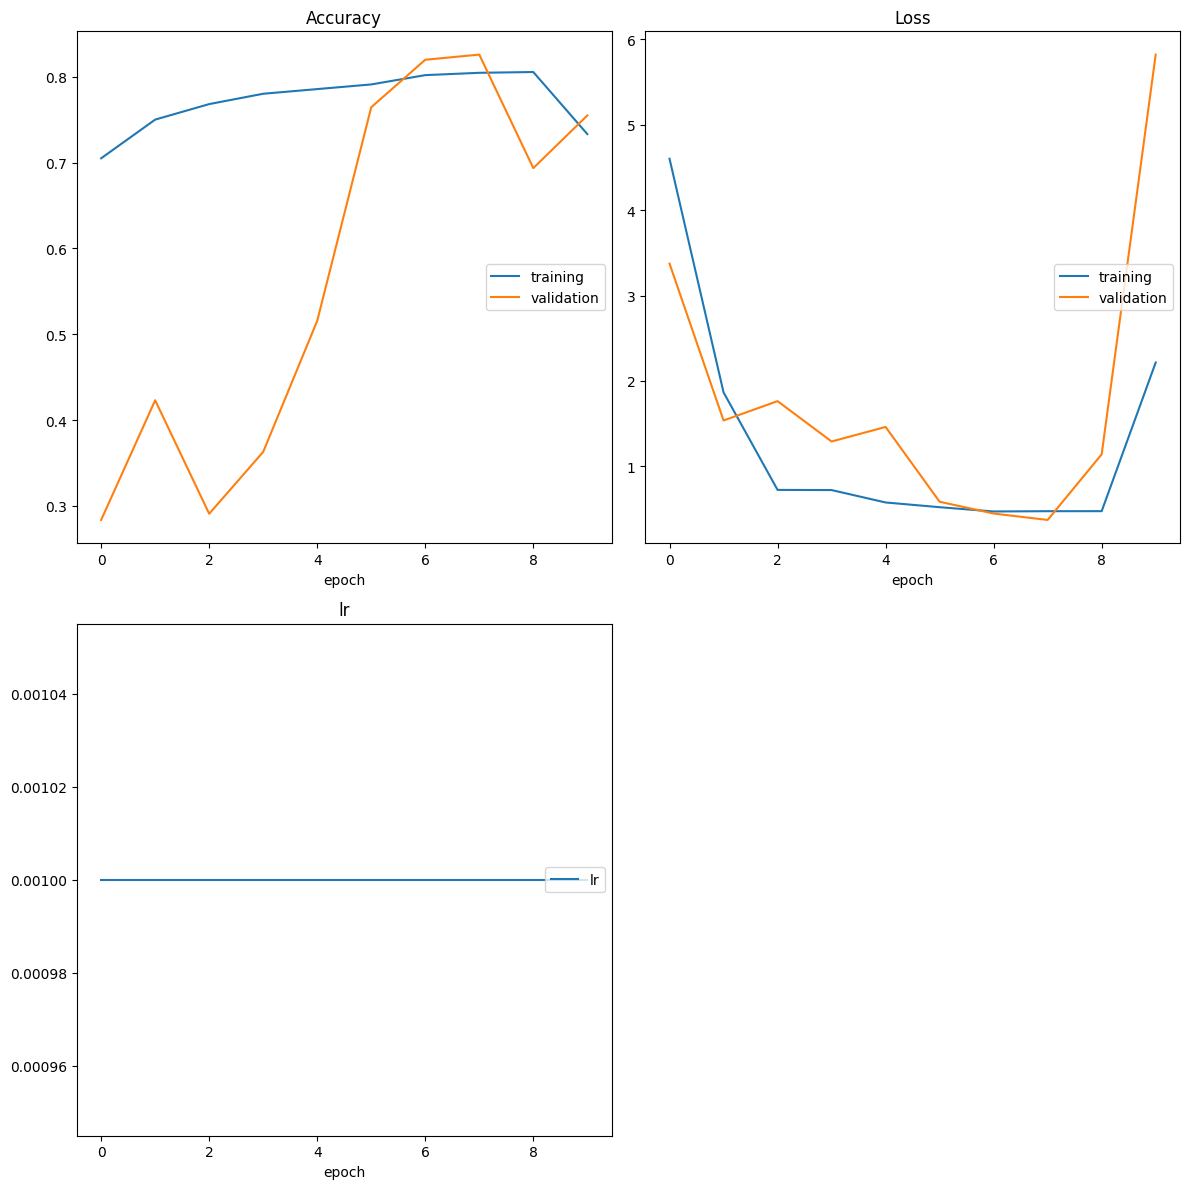

Accuracy
	training         	 (min:    0.705, max:    0.805, cur:    0.733)
	validation       	 (min:    0.284, max:    0.826, cur:    0.755)
Loss
	training         	 (min:    0.472, max:    4.603, cur:    2.216)
	validation       	 (min:    0.372, max:    5.822, cur:    5.822)
lr
	lr               	 (min:    0.001, max:    0.001, cur:    0.001)
104/104 [==============================] - 67s 644ms/step - loss: 2.2162 - acc: 0.7331 - val_loss: 5.8225 - val_acc: 0.7548 - lr: 0.0010
Epoch 10: early stopping


In [43]:
model_hist = model.fit_generator(train_df,
                                validation_data=valid_df,
                                epochs=10,
                                steps_per_epoch= steps_per_epochs,
                                validation_steps= steps_per_valid,
                                callbacks = callbacks)